In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners =[] 
strings = """ [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 100
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9860051409106266 at temperature -1
Average similarity between family and home is 0.9923971147906029 at temperature -1
Average similarity between students and their classroom is 0.9903174865780496 at temperature -1
Average similarity between workers is 0.9882733784377535 at temperature -1
Average friend similarity for adults: 0.9845432732250227 for kids: 0.981976308488225
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuild

avg restaurant similarity 0.8804764865708413
avg restaurant similarity 0.853159064390462
avg restaurant similarity 0.8588054929049078
avg restaurant similarity 0.8633442429793675
avg restaurant similarity 0.891530242216998
avg restaurant similarity 0.8773018435805584
avg restaurant similarity 0.8594018225038038
avg restaurant similarity 0.8615467046120475
avg restaurant similarity 0.8742199877491335
avg restaurant similarity 0.8736475098819113
avg restaurant similarity 0.852003202561793
avg restaurant similarity 0.8769644219382344
avg restaurant similarity 0.8593185218916375
avg restaurant similarity 0.8707031140036335
avg restaurant similarity 0.8392689766198203
avg restaurant similarity 0.8615703884900541
avg restaurant similarity 0.8733941407491191
avg restaurant similarity 0.8559984534997291
avg restaurant similarity 0.86636825679458
avg restaurant similarity 0.8765389996776909
avg restaurant similarity 0.8866460035570308
avg restaurant similarity 0.8844976889540554
avg restaurant 

avg restaurant similarity 0.8633214745707369
avg restaurant similarity 0.8461787011224559
avg restaurant similarity 0.8550578511511469
avg restaurant similarity 0.8457645662416137
avg restaurant similarity 0.8459762029851601
avg restaurant similarity 0.8678169162245095
avg restaurant similarity 0.8536280799471757
avg restaurant similarity 0.8558118314997181
avg restaurant similarity 0.8755989534995325
avg restaurant similarity 0.8659778904213462
avg restaurant similarity 0.8748663394630917
avg restaurant similarity 0.8659220912187975
avg restaurant similarity 0.8709267428280589
avg restaurant similarity 0.8678161733440427
avg restaurant similarity 0.8738815067399403
avg restaurant similarity 0.8481929594738087
avg restaurant similarity 0.8602918682303151
avg restaurant similarity 0.8625602105072785
avg restaurant similarity 0.8503535412719576
avg restaurant similarity 0.8664566529459489
avg restaurant similarity 0.8835797236972819
avg restaurant similarity 0.8711511741415605
avg restau

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.7712416666666668]
min:
0.7712416666666668
max:
0.7712416666666668
std:
0.0
mean:
0.7712416666666668
median:
0.7712416666666668
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.025255555555555555]
min:
0.025255555555555555
max:
0.025255555555555555
std:
0.0
mean:
0.025255555555555555
median:
0.025255555555555555
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.18533333333333332]
min:
0.18533333333333332
max:
0.18533333333333332
std:
0.0
mean:
0.18533333333333332
median:
0.18533333333333332
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.003980555555555556]
min:
0.003980555555555556
max:
0.003980555555555556
std:
0.0
mean:
0.003980555555555556
median:
0.003980555555555556
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

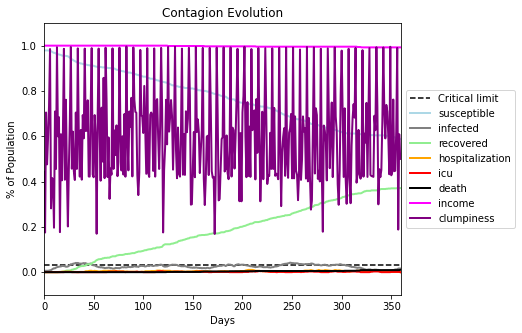

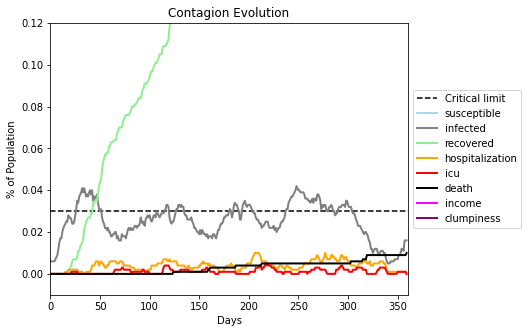

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.980419954239547 at temperature -0.999
Average similarity between family and home is 0.9924526591450437 at temperature -1
Average similarity between students and their classroom is 0.983865610941635 at temperature -0.999
Average similarity between workers is 0.9868126914277754 at temperature -0.999
Average friend similarity for adults: 0.9841759066682733 for kids: 0.9806295170707762
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 

avg restaurant similarity 0.9338771206263318
avg restaurant similarity 0.9168673820062173
avg restaurant similarity 0.9206009922113981
avg restaurant similarity 0.9210473075016584
avg restaurant similarity 0.8996816012208402
avg restaurant similarity 0.9189376885855264
avg restaurant similarity 0.9162526167360047
avg restaurant similarity 0.918843249944228
avg restaurant similarity 0.902020934973599
avg restaurant similarity 0.9098786229648987
avg restaurant similarity 0.9231791183528552
avg restaurant similarity 0.9064829309752253
avg restaurant similarity 0.9207519405112662
avg restaurant similarity 0.9160756197625184
avg restaurant similarity 0.9069149722256031
avg restaurant similarity 0.9196078271779142
avg restaurant similarity 0.899787777067409
avg restaurant similarity 0.9148115167793139
avg restaurant similarity 0.8856520410477912
avg restaurant similarity 0.9171859509903146
avg restaurant similarity 0.9231830669157629
avg restaurant similarity 0.9248216248203318
avg restauran

avg restaurant similarity 0.9095547669863503
avg restaurant similarity 0.9177972268424813
avg restaurant similarity 0.9202121602406883
avg restaurant similarity 0.9092645925844027
avg restaurant similarity 0.9119231512261659
avg restaurant similarity 0.900142994147899
avg restaurant similarity 0.928412861158738
avg restaurant similarity 0.9018109093200314
avg restaurant similarity 0.9260951690516005
avg restaurant similarity 0.9187324508712756
avg restaurant similarity 0.9350469991190106
avg restaurant similarity 0.9185537557759003
avg restaurant similarity 0.9205719919078358
avg restaurant similarity 0.9098327815223991
avg restaurant similarity 0.916171253234351
avg restaurant similarity 0.9024533021299634
avg restaurant similarity 0.8933076359759369
avg restaurant similarity 0.9208125400975867
avg restaurant similarity 0.9331818591590902
avg restaurant similarity 0.9240758574416009
avg restaurant similarity 0.9256568987395589
avg restaurant similarity 0.9167216677292293
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

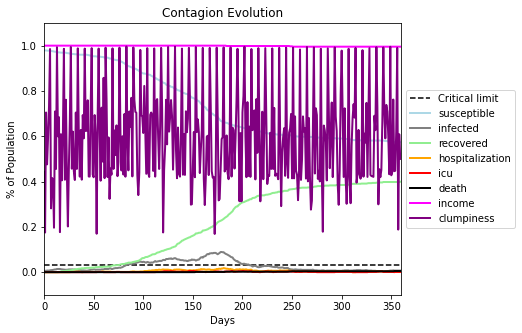

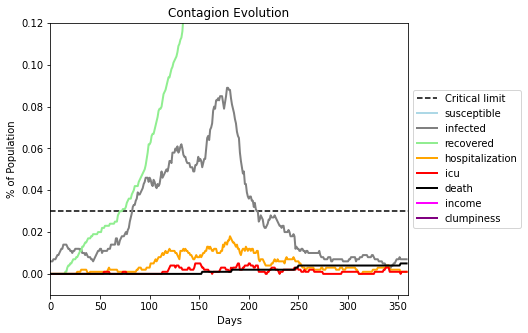

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.045346067456969716 at temperature 1
Average similarity between family and home is 0.9925806281120655 at temperature -1
Average similarity between students and their classroom is 0.1783030995877525 at temperature 1
Average similarity between workers is 0.1106816431171954 at temperature 1
Average friend similarity for adults: 0.1374136492917132 for kids: 0.16219007305067842
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (

avg restaurant similarity 0.07094754460908563
avg restaurant similarity 0.08349941136307769
avg restaurant similarity 0.07867401685477776
avg restaurant similarity 0.11443731634390267
avg restaurant similarity 0.10515122716420644
avg restaurant similarity 0.06920219631792905
avg restaurant similarity 0.06392571676521114
avg restaurant similarity 0.07012786561858243
avg restaurant similarity 0.062058947895667765
avg restaurant similarity 0.10346206925748447
avg restaurant similarity 0.10656045742047354
avg restaurant similarity 0.11197298819057881
avg restaurant similarity 0.08549102943527205
avg restaurant similarity 0.1019798583413081
avg restaurant similarity 0.0790677613778561
avg restaurant similarity 0.13222287164199192
avg restaurant similarity 0.05353432725766493
avg restaurant similarity 0.07217610436325421
avg restaurant similarity 0.08226583219584542
avg restaurant similarity 0.0847669846131826
avg restaurant similarity 0.0981068885121634
avg restaurant similarity 0.139346084

avg restaurant similarity 0.09222797184531599
avg restaurant similarity 0.04647441158496432
avg restaurant similarity 0.08133676774405366
avg restaurant similarity 0.04369820144927818
avg restaurant similarity 0.06729924989508361
avg restaurant similarity 0.07229914513959183
avg restaurant similarity 0.09639774208445644
avg restaurant similarity 0.10340382539756922
avg restaurant similarity 0.09725455259992252
avg restaurant similarity 0.11439724295920367
avg restaurant similarity 0.08872022320799165
avg restaurant similarity 0.06414557892285878
avg restaurant similarity 0.08201784624676617
avg restaurant similarity 0.10215774810354156
avg restaurant similarity 0.09984105607871412
avg restaurant similarity 0.08511439506768599
avg restaurant similarity 0.07805243354701083
avg restaurant similarity 0.10268586077494335
avg restaurant similarity 0.0580247428032931
avg restaurant similarity 0.08570553004595828
avg restaurant similarity 0.05867177248115657
avg restaurant similarity 0.0601368

(<function dict.items>, <function dict.items>, <function dict.items>)

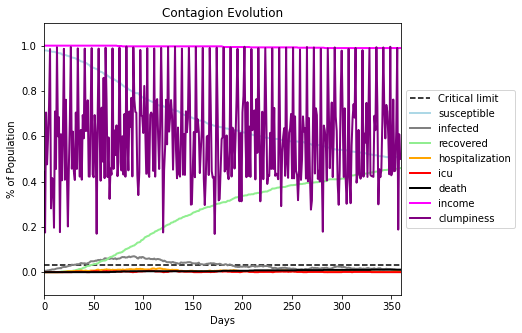

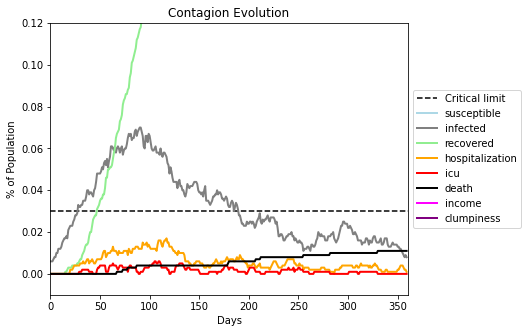

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.35250001518086205 at temperature 0
Average similarity between family and home is 0.992431635684071 at temperature -1
Average similarity between students and their classroom is 0.41207489736489566 at temperature 0
Average similarity between workers is 0.36116577868632066 at temperature 0
Average friend similarity for adults: 0.36160283454552505 for kids: 0.37212460474435327
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units 

avg restaurant similarity 0.18934974091158133
avg restaurant similarity 0.2175176319287029
avg restaurant similarity 0.1746841190941081
avg restaurant similarity 0.21466371284476907
avg restaurant similarity 0.19517135485756557
avg restaurant similarity 0.2208147290698303
avg restaurant similarity 0.1960014357934655
avg restaurant similarity 0.20632274814979323
avg restaurant similarity 0.19784535978141896
avg restaurant similarity 0.20601302656542148
avg restaurant similarity 0.23355106130846184
avg restaurant similarity 0.242564753205956
avg restaurant similarity 0.2485926390637149
avg restaurant similarity 0.2118838138955588
avg restaurant similarity 0.20036220197829263
avg restaurant similarity 0.16027017430124088
avg restaurant similarity 0.20399140156813214
avg restaurant similarity 0.18384390312668172
avg restaurant similarity 0.25014416125260996
avg restaurant similarity 0.1613308996260611
avg restaurant similarity 0.2428903943404373
avg restaurant similarity 0.2208012748092756

avg restaurant similarity 0.2613446066634042
avg restaurant similarity 0.2162449228339733
avg restaurant similarity 0.19929810504090115
avg restaurant similarity 0.22608747171326743
avg restaurant similarity 0.18884366399877536
avg restaurant similarity 0.1954296145494512
avg restaurant similarity 0.23693912719900279
avg restaurant similarity 0.20405877418628812
avg restaurant similarity 0.19294878478483873
avg restaurant similarity 0.19072255762437848
avg restaurant similarity 0.20053400129121624
avg restaurant similarity 0.16668773348251897
avg restaurant similarity 0.17571495816149457
avg restaurant similarity 0.21846025793365384
avg restaurant similarity 0.18379899800002034
avg restaurant similarity 0.2015447817420588
avg restaurant similarity 0.21049712454580657
avg restaurant similarity 0.23834173292073033
avg restaurant similarity 0.21610478658113913
avg restaurant similarity 0.23357271136276384
avg restaurant similarity 0.22752057164878803
avg restaurant similarity 0.2159640875

(<function dict.items>, <function dict.items>, <function dict.items>)

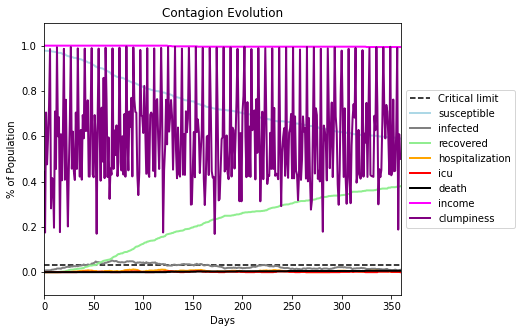

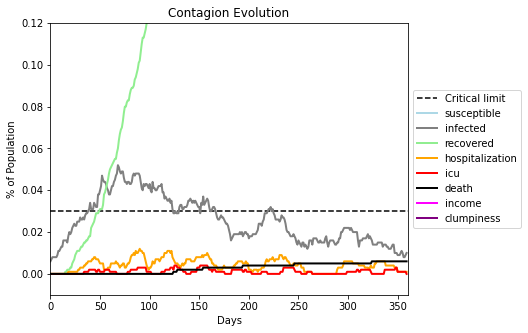

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.7126281619958719 at temperature -0.9
Average similarity between family and home is 0.992803808280724 at temperature -1
Average similarity between students and their classroom is 0.5146549423316449 at temperature -0.9
Average similarity between workers is 0.5244072723845733 at temperature -0.9
Average friend similarity for adults: 0.7361823388722949 for kids: 0.6141586482729244
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 un

avg restaurant similarity 0.23223745710811547
avg restaurant similarity 0.32000180174428844
avg restaurant similarity 0.2172082287189001
avg restaurant similarity 0.31191157119303564
avg restaurant similarity 0.25883147653906463
avg restaurant similarity 0.25006703859808876
avg restaurant similarity 0.26132203526616826
avg restaurant similarity 0.23379396811877595
avg restaurant similarity 0.21176449395768612
avg restaurant similarity 0.22820688104745737
avg restaurant similarity 0.2862286515468916
avg restaurant similarity 0.17358345813667106
avg restaurant similarity 0.31033788818726754
avg restaurant similarity 0.3483971510493045
avg restaurant similarity 0.2590108342046425
avg restaurant similarity 0.2522399828258815
avg restaurant similarity 0.3273172887095251
avg restaurant similarity 0.3199469757661574
avg restaurant similarity 0.27282946062405417
avg restaurant similarity 0.20858056887318854
avg restaurant similarity 0.2858144053831951
avg restaurant similarity 0.32096845353892

avg restaurant similarity 0.21574919673377418
avg restaurant similarity 0.2589328428644026
avg restaurant similarity 0.22952380167268369
avg restaurant similarity 0.23412258111599654
avg restaurant similarity 0.28361742135783047
avg restaurant similarity 0.3153641502966021
avg restaurant similarity 0.2226674843813974
avg restaurant similarity 0.2889411713981121
avg restaurant similarity 0.31541995250630445
avg restaurant similarity 0.26934228095058854
avg restaurant similarity 0.20672416677618397
avg restaurant similarity 0.28278468624973024
avg restaurant similarity 0.28904475586325606
avg restaurant similarity 0.22486850768154518
avg restaurant similarity 0.27310465082890323
avg restaurant similarity 0.2142424571670121
avg restaurant similarity 0.2900150482990238
avg restaurant similarity 0.345994580068827
avg restaurant similarity 0.2267042606069733
avg restaurant similarity 0.22980980949881868
avg restaurant similarity 0.24511590646656367
avg restaurant similarity 0.226124462640883

(<function dict.items>, <function dict.items>, <function dict.items>)

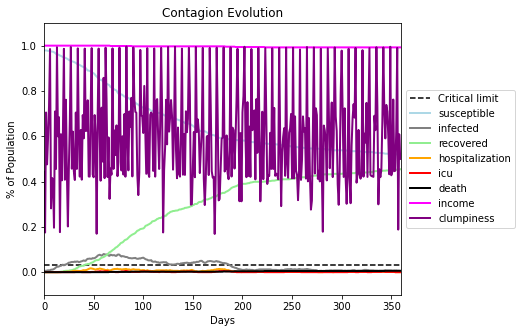

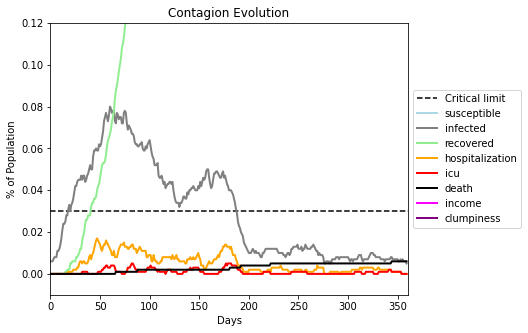

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])